In [1]:
#https://raw.githubusercontent.com/hernanChain/csvFiles/master/WholesaleCustomers/WholesaleCustomers.csv
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv("https://raw.githubusercontent.com/hernanChain/csvFiles/master/WholesaleCustomers/WholesaleCustomers.csv")

In [3]:
data.shape

(440, 8)

In [4]:
data.isnull().sum()

Channel             0
Region              0
Fresh               0
Milk                0
Grocery             0
Frozen              0
Detergents_Paper    0
Delicassen          0
dtype: int64

In [5]:
data.dtypes

Channel             int64
Region              int64
Fresh               int64
Milk                int64
Grocery             int64
Frozen              int64
Detergents_Paper    int64
Delicassen          int64
dtype: object

In [6]:
indices = [26, 176, 392]
samples = pd.DataFrame(data.loc[indices], columns=data.keys()).reset_index(drop=True)

In [7]:
data = data.drop(indices, axis =0)
data = data.drop(['Channel','Region'],axis=1)
samples = samples.drop(['Channel','Region'],axis=1)

In [9]:
from sklearn import preprocessing

In [10]:
normalized_data = preprocessing.Normalizer().fit_transform(data)
normalized_sample = preprocessing.Normalizer().fit_transform(samples)

In [14]:
normalized_data.shape

(437, 6)

In [15]:
from sklearn.cluster import KMeans

In [17]:
X = normalized_data.copy()

In [18]:
inercia = []
for i in range(1, 20):
  algorithm = KMeans(n_clusters=i, init='k-means++',max_iter=300, n_init=10)
  algorithm.fit(X)
  inercia.append(algorithm.inertia_)

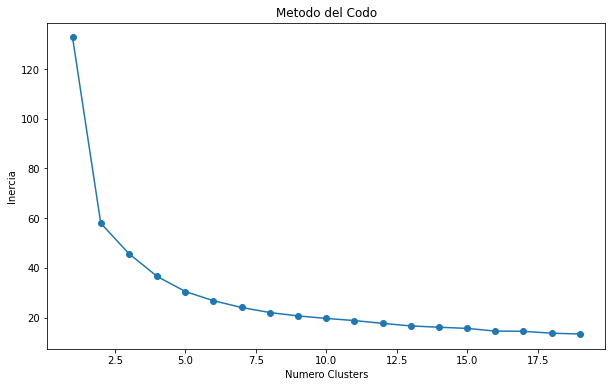

In [19]:
plt.figure(figsize=[10,6])
plt.title('Metodo del Codo')
plt.xlabel('Numero Clusters')
plt.ylabel('Inercia')
plt.plot(list(range(1,20)),inercia, marker='o')
plt.show()

In [27]:
algoritmo = KMeans(n_clusters=6, init='k-means++',max_iter=300, n_init=10)

In [28]:
algoritmo.fit(X)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=6, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [31]:
centers, labels = algoritmo.cluster_centers_, algoritmo.labels_

In [34]:
labels.shape

(437,)

In [35]:
pred = algoritmo.predict(normalized_sample)
for i, p in enumerate(pred):
  print("Muestra ",i," se encuentra en el cluster: ",p)

Muestra  0  se encuentra en el cluster:  1
Muestra  1  se encuentra en el cluster:  1
Muestra  2  se encuentra en el cluster:  4


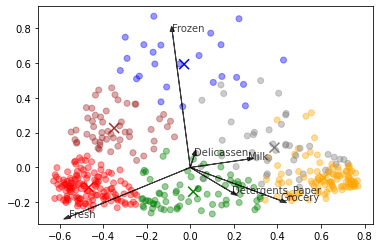

In [39]:
### GRAFICAR LOS DATOS JUNTO A LOS RESULTADOS ###
# Se aplica la reducción de dimensionalidad a los datos
from sklearn.decomposition import PCA

modelo_pca = PCA(n_components = 2)
modelo_pca.fit(X)
pca = modelo_pca.transform(X) 

#Se aplicar la reducción de dimsensionalidad a los centroides
centroides_pca = modelo_pca.transform(centers)

# Se define los colores de cada clúster
colores = ['blue', 'red', 'green', 'orange', 'gray', 'brown']

#Se asignan los colores a cada clústeres
colores_cluster = [colores[labels[i]] for i in range(len(pca))]

#Se grafica los componentes PCA
plt.scatter(pca[:, 0], pca[:, 1], c = colores_cluster, 
            marker = 'o',alpha = 0.4)

#Se grafican los centroides
plt.scatter(centroides_pca[:, 0], centroides_pca[:, 1],
            marker = 'x', s = 100, linewidths = 3, c = colores)

#Se guadan los datos en una variable para que sea fácil escribir el código
xvector = modelo_pca.components_[0] * max(pca[:,0])
yvector = modelo_pca.components_[1] * max(pca[:,1])
columnas = data.columns

#Se grafican los nombres de los clústeres con la distancia del vector
for i in range(len(columnas)):
    #Se grafican los vectores
    plt.arrow(0, 0, xvector[i], yvector[i], color = 'black', 
              width = 0.0005, head_width = 0.02, alpha = 0.75)
    #Se colocan los nombres
    plt.text(xvector[i], yvector[i], list(columnas)[i], color='black', 
             alpha=0.75)

plt.show()